<a href="https://colab.research.google.com/github/zayyanshareef/Health_radar_chart/blob/main/health_radar_chart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving radar_chart_data 2.xlsx to radar_chart_data 2 (1).xlsx


<ipython-input-4-dc7ea6ee19f2>:11: FutureWarning: Passing bytes to 'read_excel' is deprecated and will be removed in a future version. To read from a byte string, wrap it in a `BytesIO` object.
  df = pd.read_excel(uploaded[excel_file])


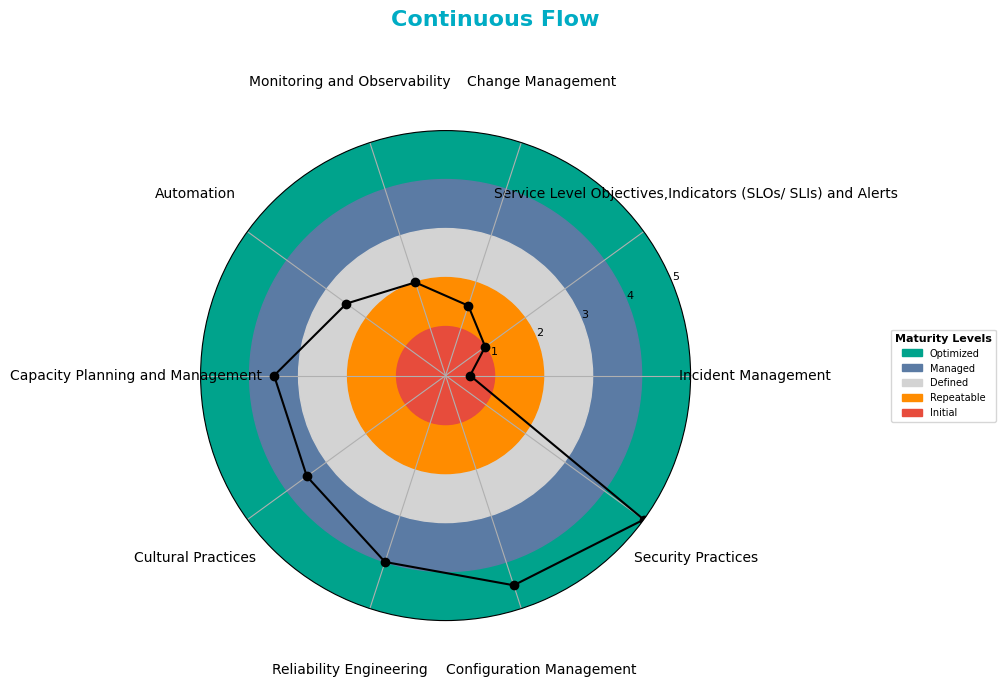

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import pi
import matplotlib.patches as mpatches
from google.colab import files

uploaded = files.upload()

excel_file = list(uploaded.keys())[0]  # Get the first (and likely only) file name
df = pd.read_excel(uploaded[excel_file])

categories = df['Categories'].tolist()
values = df['Values'].tolist()

num_vars = len(categories)

angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([0.2, 0.1, 0.5, 0.7], polar=True)

# Define concentric circles
num_rings = 5
max_value = 5
ring_values = np.linspace(1, max_value, num_rings)
patches = []
labels = ['Initial', 'Repeatable', 'Defined', 'Managed', 'Optimized']
custom_colors = ['#E74C3C', '#FF8C00', '#D3D3D3', '#5B7BA4', '#00A38C']

for i in range(num_rings, 0, -1):
    radius = ring_values[i - 1]
    circle = plt.Circle((0, 0), radius,
                        transform=ax.transData._b,
                        color=custom_colors[i - 1],
                        alpha=1.0,
                        label=labels[i - 1])
    ax.add_patch(circle)
    patch = mpatches.Patch(color=custom_colors[i - 1], label=labels[i - 1], alpha=1.0)
    patches.append(patch)

plot_values = values + values[:1]
ax.plot(angles, plot_values, linewidth=1.5, linestyle='solid', color='black')
ax.plot(angles[:-1], values, 'o', color='Black', markersize=6)

ax.set_ylim(0, max_value)

ax.set_xticks(angles[:-1])
ax.tick_params(axis='x', pad=36)
ax.set_xticklabels(categories, fontsize=10)

plt.figtext(0.5, 0.95, "Continuous Flow",
            fontweight='bold', size=16, ha='center', color='#00ACC4')


ax.set_yticks(ring_values)
ax.set_yticklabels([str(int(r)) for r in ring_values], fontsize=8, color='black')  # Add labels

legend = ax.legend(handles=patches, loc='center left', bbox_to_anchor=(1.4, 0.5),
                   title="Maturity Levels", fontsize=7)
legend.get_title().set_fontsize('8')
legend.get_title().set_fontweight('bold')

ax.yaxis.grid(False)

plt.savefig("radar_chart_fixed.png", dpi=300, bbox_inches='tight')
plt.savefig("radar_chart_fixed.svg", dpi=300, bbox_inches='tight')

plt.show()

